In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("C:/Users/49151/Downloads/amz_uk_price_prediction_dataset.csv")
df.head(5)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [2]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

In [3]:
# Crosstab counts
ct = pd.crosstab(df['category'], df['isBestSeller'])
# Proportion of best sellers
prop = ct.div(ct.sum(axis=1), axis=0)[True]
# Sort descending
prop_sorted = prop.sort_values(ascending=False)

print(prop_sorted.head(10)) 

category
Grocery                           0.058135
Smart Home Security & Lighting    0.057692
Health & Personal Care            0.057686
Mobile Phone Accessories          0.042471
Power & Hand Tools                0.035339
Billiard, Snooker & Pool          0.032129
Pet Supplies                      0.030200
Home Brewing & Wine Making        0.028455
Wind Instruments                  0.028000
Mirrors                           0.028000
Name: True, dtype: float64


In [4]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(ct)
print(f"Chi2 = {chi2:.1f}, p-value = {p:.2e}, dof = {dof}")


Chi2 = 36540.2, p-value = 0.00e+00, dof = 295


In [5]:
import numpy as np

n = ct.values.sum()  
phi2 = chi2 / n
r, k = ct.shape       
V = np.sqrt(phi2 / min(r-1, k-1))
print(f"Cramér’s V = {V:.3f}")


Cramér’s V = 0.122


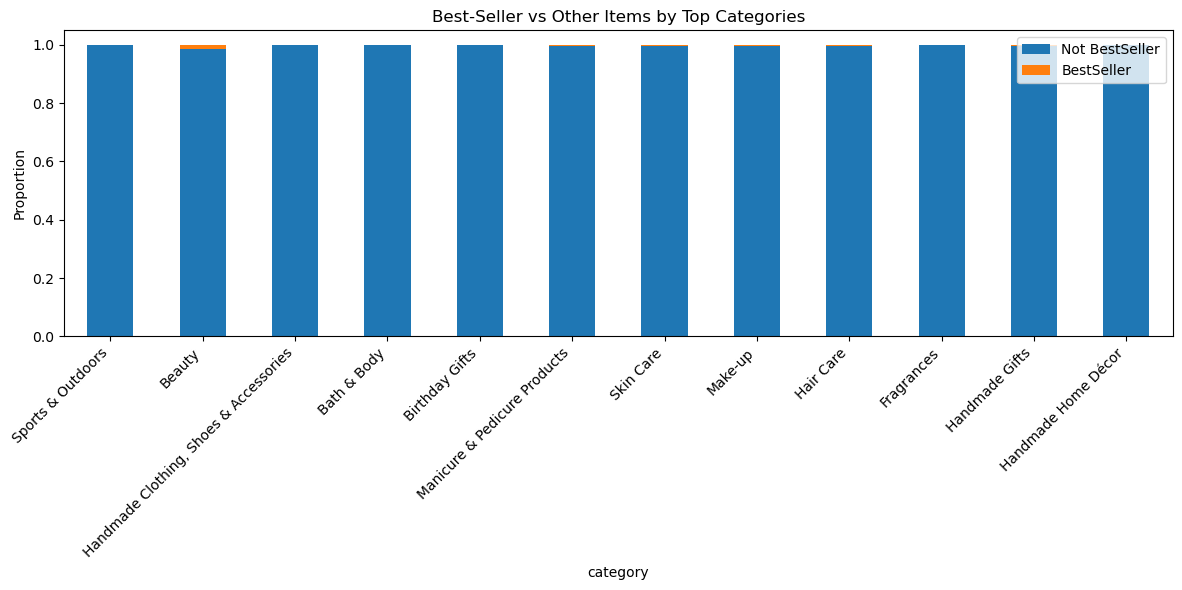

In [6]:
import matplotlib.pyplot as plt

# crosstab, normalized per row
ct_norm = ct.div(ct.sum(axis=1), axis=0)

# top N categories by total product count 
top_categories = df['category'].value_counts().head(12).index
ct_plot = ct_norm.loc[top_categories]

ct_plot.plot(kind='bar', stacked=True, figsize=(12,6))
plt.ylabel('Proportion')
plt.title('Best-Seller vs Other Items by Top Categories')
plt.legend(['Not BestSeller','BestSeller'], loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [7]:
# Compute IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

print(f"Removed {len(df) - len(df_no_outliers)} outliers.")


Removed 327688 outliers.


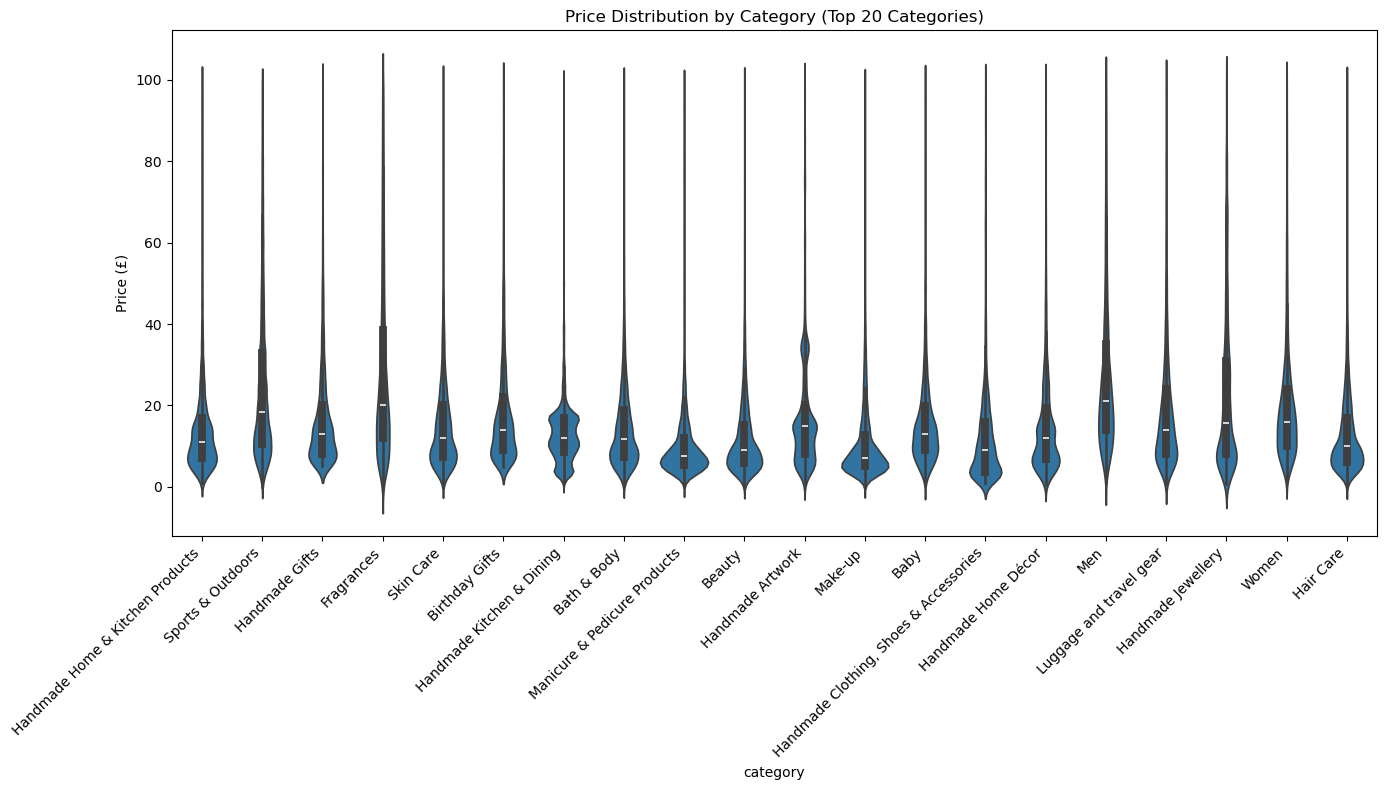

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Top 20 categories by count
top20_categories = df_no_outliers['category'].value_counts().head(20).index
df_top20 = df_no_outliers[df_no_outliers['category'].isin(top20_categories)]

plt.figure(figsize=(14, 8))
sns.violinplot(data=df_top20, x='category', y='price')
plt.xticks(rotation=45, ha='right')
plt.title('Price Distribution by Category (Top 20 Categories)')
plt.ylabel('Price (£)')
plt.tight_layout()
plt.show()


In [9]:
medians = df_no_outliers.groupby('category')['price'].median().sort_values(ascending=False)
print(medians.head(10))  # Highest median price categories


category
Desktop PCs               74.00
Boxing Shoes              69.79
Tablets                   69.00
Graphics Cards            68.54
Motherboards              67.92
Made in Italy Handmade    64.00
Digital Frames            63.90
Streaming Clients         62.68
Golf Shoes                62.39
Ski Helmets               61.33
Name: price, dtype: float64


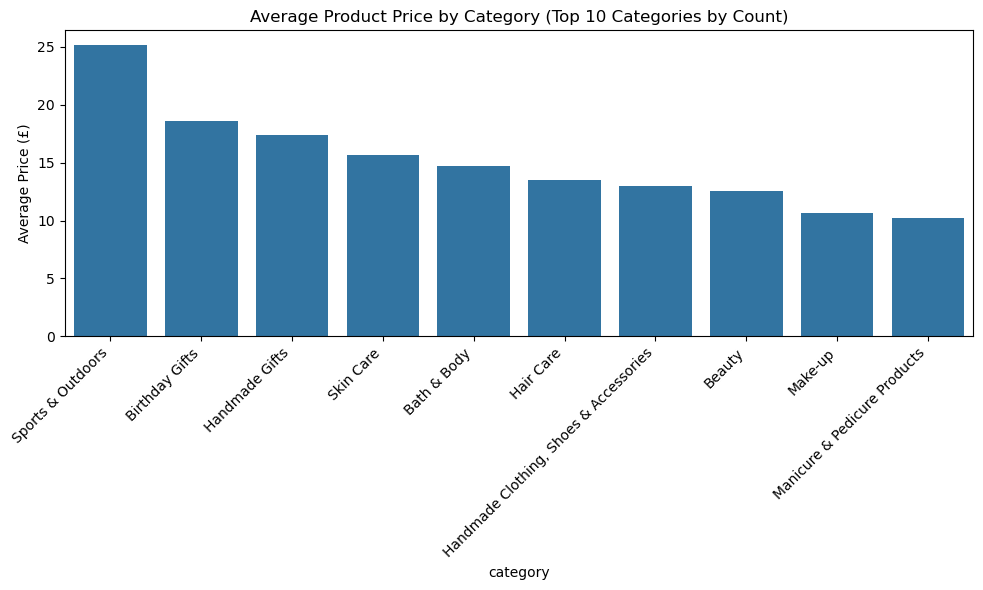

In [10]:
# Top 10 categories by product count
top10_categories = df_no_outliers['category'].value_counts().head(10).index
df_top10 = df_no_outliers[df_no_outliers['category'].isin(top10_categories)]

# Mean price per category
avg_prices = df_top10.groupby('category')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_prices.index, y=avg_prices.values)
plt.title('Average Product Price by Category (Top 10 Categories by Count)')
plt.ylabel('Average Price (£)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


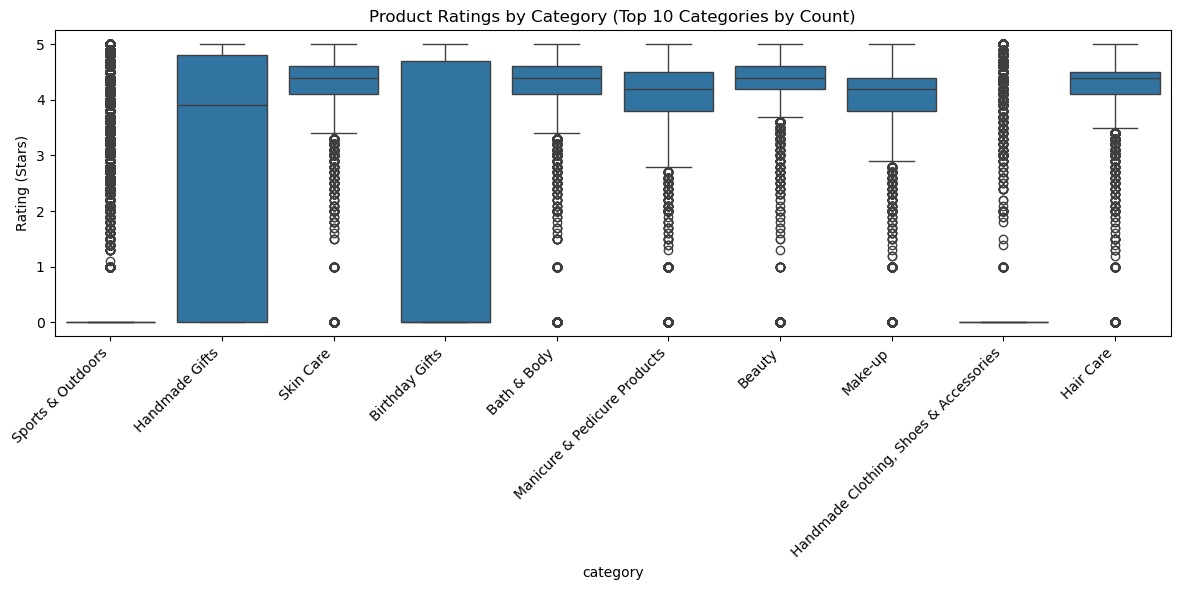

In [11]:
# Boxplot for ratings
plt.figure(figsize=(12,6))
sns.boxplot(data=df_top10, x='category', y='stars')
plt.title('Product Ratings by Category (Top 10 Categories by Count)')
plt.ylabel('Rating (Stars)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [12]:
median_ratings = df_no_outliers.groupby('category')['stars'].median().sort_values(ascending=False)
print(median_ratings.head(10))  # Categories with highest typical ratings


category
Computer Memory                 4.7
Building & Construction Toys    4.6
Office Paper Products           4.6
Luxury Food & Drink             4.6
Kids' Play Figures              4.6
Hobbies                         4.6
Beer, Wine & Spirits            4.6
Laptop Accessories              4.6
Cables & Accessories            4.5
CPUs                            4.5
Name: stars, dtype: float64


In [13]:
correlation = df_no_outliers['price'].corr(df_no_outliers['stars'])
print(f"Correlation between price and rating: {correlation:.4f}")


Correlation between price and rating: -0.0777


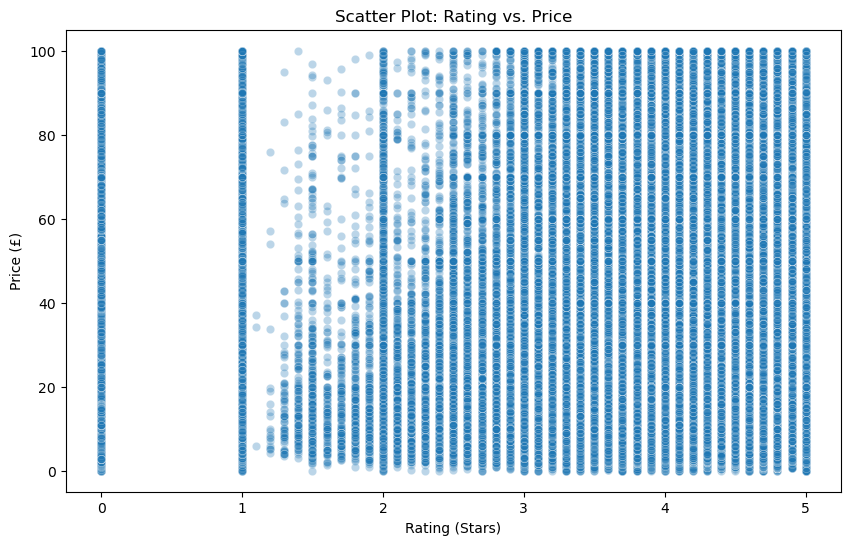

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_no_outliers, x='stars', y='price', alpha=0.3)
plt.title('Scatter Plot: Rating vs. Price')
plt.xlabel('Rating (Stars)')
plt.ylabel('Price (£)')
plt.show()


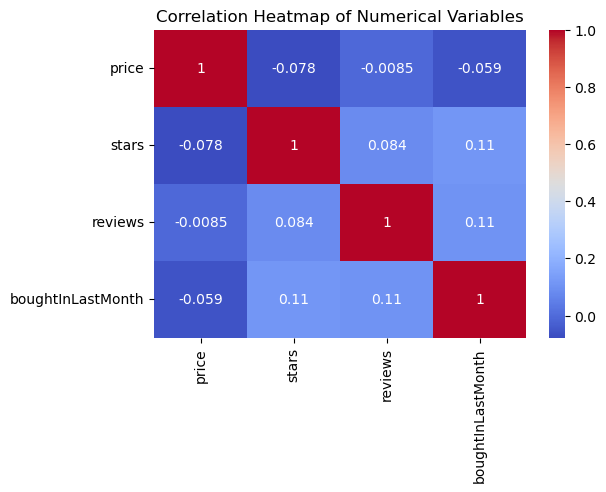

In [15]:
import numpy as np

plt.figure(figsize=(6, 4))
sns.heatmap(df_no_outliers[['price', 'stars', 'reviews', 'boughtInLastMonth']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


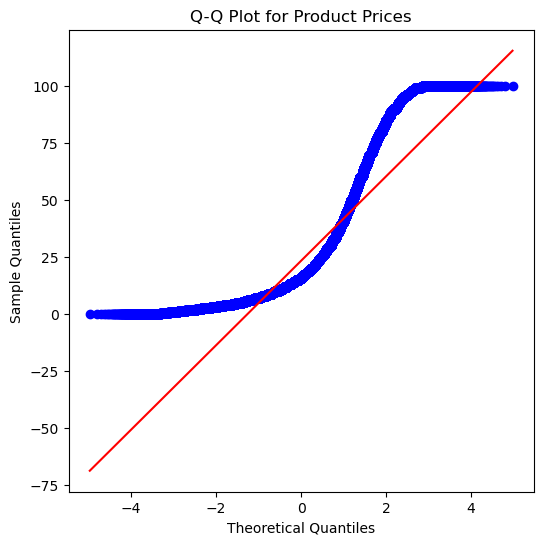

In [16]:
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
stats.probplot(df_no_outliers['price'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Product Prices')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()


Analysis of Amazon UK product data reveals that product category significantly influences pricing, with categories like Sports & Outdoors and Fragrances showing higher average and median prices, while handmade and beauty-related categories tend to be lower priced and more tightly clustered. Despite assumptions, price and rating show almost no correlation (r = -0.0777), indicating that higher-priced products aren’t necessarily better rated. Most ratings hover between 4.0–4.8 stars, but Sports & Outdoors stands out for its many zero-rated products, signaling possible quality or review visibility issues. Price distribution is highly right-skewed, so median-based metrics are more reliable than means. Overall, pricing strategy should focus on value perception and category-specific positioning, rather than assuming premium pricing will drive higher customer satisfaction.